# Assignment 3
### Due 9/23. Do four of five.

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [86]:
import pandas as pd
import numpy as np

nhanes_csv = "/Users/hmillspaugh/DS6021_PredMod/data/nhanes_data_17_18.csv"

df = pd.read_csv(nhanes_csv)

/var/folders/y_/phzh628d6zbf6v3y77kmbp7h0000gp/T/ipykernel_96734/3996479043.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(nhanes_csv)


In [87]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 25)   
df.head(10)

,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,...,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,...,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,...,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,...,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,...,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
5,93708.0,Good,NaN,NaN,NaN,...,NaN,60.0,118.0,0.0,Never
6,93709.0,NaN,NaN,NaN,NaN,...,NaN,62.0,200.0,0.0,6 to 10
7,93711.0,Very good,NaN,NaN,NaN,...,NaN,69.0,142.0,0.0,Never
8,93712.0,Good,NaN,NaN,NaN,...,Months,68.0,135.0,0.0,Never
9,93713.0,Very good,NaN,NaN,NaN,...,Days,70.0,165.0,0.0,Never


In [88]:
[col for col in df.columns]

['SEQN',
 'GeneralHealthCondition',
 'EverBreastfedOrFedBreastmilk',
 'AgeStoppedBreastfeedingdays',
 'AgeFirstFedFormuladays',
 'AgeStoppedReceivingFormuladays',
 'AgeStartedOtherFoodbeverage',
 'AgeFirstFedMilkdays',
 'TypeOfMilkFirstFedWholeMilk',
 'TypeOfMilkFirstFed2Milk',
 'TypeOfMilkFirstFed1Milk',
 'TypeOfMilkFirstFedFatFreeMilk',
 'TypeOfMilkFirstFedSoyMilk',
 'TypeOfMilkFirstFedOther',
 'HowHealthyIsTheDiet',
 'Past30DayMilkProductConsumption',
 'YouDrinkWholeOrRegularMilk',
 'YouDrink2FatMilk',
 'YouDrink1FatMilk',
 'YouDrinkFatFreeskimMilk',
 'YouDrinkSoyMilk',
 'YouDrinkAnotherTypeOfMilk',
 'RegularMilkUse5TimesPerWeek',
 'HowOftenDrankMilkAge512',
 'HowOftenDrankMilkAge1317',
 'HowOftenDrankMilkAge1835',
 'CommunitygovernmentMealsDelivered',
 'EatMealsAtCommunityseniorCenter',
 'AttendKindergartenThruHighSchool',
 'SchoolServesSchoolLunches',
 'OfTimesweekGetSchoolLunch',
 'SchoolLunchFreeReducedOrFullPrice',
 'SchoolServeCompleteBreakfastEachDay',
 'OfTimesweekGetSchoolB

Our two categorical variables or interest: 
 
        X: 'TakeMedicationForDepression'       
        Y: 'HowOftenDoYouFeelWorriedOrAnxious'     

Now, investigate missing values

In [89]:
X = 'TakeMedicationForDepression'   
Y = 'HowOftenDoYouFeelWorriedOrAnxious' 

df["TakeMedsForDepression"] = ["yes" if x == 1.0 else "no" if x == 0.0 else np.nan for x in df[X]]

df["TakeMedsForDepression"].value_counts(dropna=False)

TakeMedsForDepression
no     4889
NaN    2915
yes     562
Name: count, dtype: int64

In [90]:
labels = ['daily', 'weekly', 'monthly', 'a few times a year', 'never']

# Ensure the column is integer (if NaNs exist, handle them)
df['HowOftenDoYouFeelWorriedOrAnxious'] = df['HowOftenDoYouFeelWorriedOrAnxious'].apply(
    lambda x: labels[int(x)] if pd.notnull(x) else 'missing'
)

df['HowOftenDoYouFeelWorriedOrAnxious'].value_counts(dropna=False)


HowOftenDoYouFeelWorriedOrAnxious
missing               2925
weekly                1846
daily                 1357
never                  820
a few times a year     773
monthly                645
Name: count, dtype: int64

In [91]:
# Create contingency table
contingency_table = pd.crosstab(
    df['TakeMedsForDepression'],
    df['HowOftenDoYouFeelWorriedOrAnxious'],
    dropna=False
)

contingency_table.reindex(columns=labels)

HowOftenDoYouFeelWorriedOrAnxious,daily,weekly,monthly,a few times a year,never
TakeMedsForDepression,,,,,
no,1331,1743,577,648,579
yes,26,102,68,123,240
NaN,0,1,0,2,1


In [92]:
contingency_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0).reindex(columns=labels)

contingency_norm

HowOftenDoYouFeelWorriedOrAnxious,daily,weekly,monthly,a few times a year,never
TakeMedsForDepression,,,,,
no,0.272244,0.356515,0.118020,0.132542,0.118429
yes,0.046263,0.181495,0.120996,0.218861,0.427046
NaN,0.000000,0.000343,0.000000,0.000686,0.000343


Above is a contigency table comparing how often one is anxious or worried when they are on medication and when they are off it. As you can see I computed two tables, both pull from the same data but I thought the second is easier to interpret because each row is normalized to sum to 1. 

The results are not what I expected. The table shows that among people on medication, a larger share report feeling anxious “never” or only a few times a year (0.427 and 0.219), whereas those not on medication are more evenly distributed across the higher-frequency categories. This could reflect that medication is very effective, or it could suggest that people on medication are a selected group whose anxiety levels have already improved.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

Our two categorical variables or interest: 
 
        X: 'EverToldDoctorHadTroubleSleeping'    # Categorical
        Y: 'SleepHoursWeekdaysOrWorkdays'         # Numeric

Now, investigate missing values

In [93]:
df['EverToldDoctorHadTroubleSleeping'].value_counts(dropna=False)

EverToldDoctorHadTroubleSleeping
0.0    4264
NaN    2542
1.0    1560
Name: count, dtype: int64

In [94]:
df['SleepHoursWeekdaysOrWorkdays'].describe()

count    5783.000000
mean        7.643005
std         1.672216
min         2.000000
25%         7.000000
50%         8.000000
75%         8.500000
max        14.000000
Name: SleepHoursWeekdaysOrWorkdays, dtype: float64

In [95]:
desc_table = df.groupby('EverToldDoctorHadTroubleSleeping')['SleepHoursWeekdaysOrWorkdays'].describe()
desc_table

,count,mean,std,min,25%,50%,75%,max
EverToldDoctorHadTroubleSleeping,,,,,,,,
0.0,4239.0,7.682708,1.612484,2.0,7.0,8.0,8.5,14.0
1.0,1540.0,7.527597,1.818445,2.0,6.5,7.5,9.0,14.0


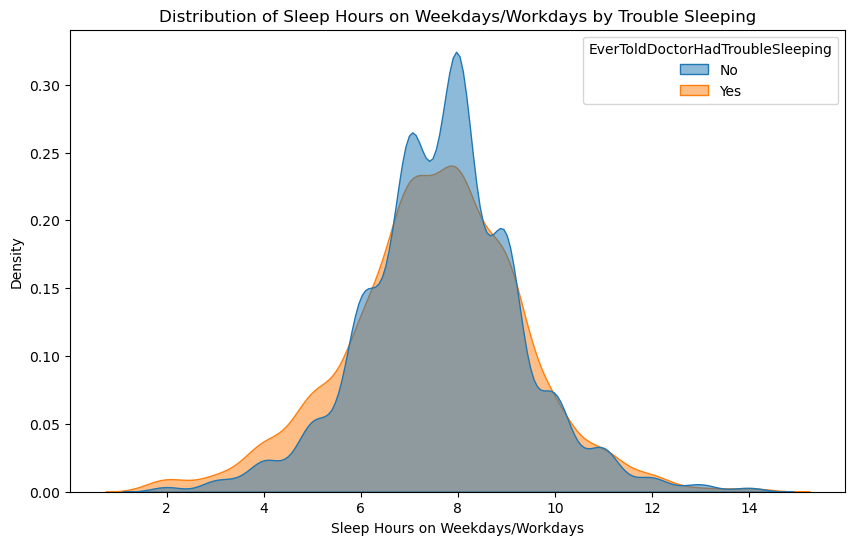

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

df["EverToldDoctorHadTroubleSleeping"] = df["EverToldDoctorHadTroubleSleeping"].map({0: "No", 1: "Yes"})

plt.figure(figsize=(10,6))
sns.kdeplot(
    data = df, 
    x = "SleepHoursWeekdaysOrWorkdays",        # numeric variable
    hue = "EverToldDoctorHadTroubleSleeping",  # categorical variable
    fill = True,
    common_norm = False,                       # normalizes each group independently
    alpha = 0.5
)
plt.title("Distribution of Sleep Hours on Weekdays/Workdays by Trouble Sleeping")
plt.xlabel("Sleep Hours on Weekdays/Workdays")
plt.ylabel("Density")
plt.show()

Above is the kernel density plot for the Distribution of Sleep Hours on Weekdays/Workdays by Trouble Sleeping. I set common_norm paramater in the kdeplot method to False to adjust for the fact that there were significantly less people who reported that they had trouble sleeping to a doctor. 

This plot is also counterintuitive. The discrepency between kernel density plots between the "Yes" and "No" samples are very similar (also reflected in the descrpitive table). The "No" group pinnicle is slightly higher at around 8.1 Sleep Hours, indicating more data points were concentrated around that point, but overall the difference between the groups is minimal.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

I attached photo of solution to pdf because I didn't know how to type it into markdown cleanly.

4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [97]:
class LCLS:
    def __init__(self, X, Y, h=None):
        """
        LCLS/Nadaraya-Watson estimator using Silverman's plug-in bandwidth.
        X: predictor (pandas Series or array-like)
        Y: response (pandas Series or array-like)
        h: bandwidth (optional, computed with Silverman's rule if None)
        """
        self.X = np.array(X) # predictor values, ensure array
        self.Y = np.array(Y) # response values, ensure array
        self.n = len(X)      # sample size

        if h is not None: # check if bandwidth is provided
            self.h = h
        else: # use Silverman's rule if bandwidth is not provided
            self.h = self._compute_bandwidth()

        self.grid = np.sort(np.unique(X))  # extract and sort unique values for x

    def _compute_bandwidth(self):
        """Silverman's plug-in estimate"""
        iqr = np.quantile(self.X, 0.75) - np.quantile(self.X, 0.25)  # correct
        h = 0.9 * min(np.std(self.X), iqr/1.34) * len(self.X) **(-0.2) # plug-in bandwidth
        print(f"Computed bandwidth is: {h}") # print for debugging
        return h #return bandwidth

    def _kernel(self, x_diff):
        """Gaussian kernel (normalized)"""
        return np.exp(-0.5 * (x_diff / self.h)**2) / (np.sqrt(2*np.pi) * self.h)  # Gaussian kernel weights

    def fit(self):
        """Compute LCLS estimates at grid points"""
        X_diff = self.X.reshape(-1,1) - self.grid.reshape(1,-1)  # differences between X and grid
        K = self._kernel(X_diff) # kernel weights
        numerator = self.Y @ K  # weighted sum of Y
        denominator = np.sum(K, axis=0) # sum of weights
        self.y_hat = numerator / denominator  # LCLS estimates
        return self.y_hat, self.grid  # return estimates and grid

    def plot(self, df=None, x_col=None, y_col=None):
        """Optional plotting with seaborn"""
        if df is not None and x_col is not None and y_col is not None:
            sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.05)  # scatter plot of data
        plt.plot(self.grid, self.y_hat, color='orange', label='LCLS estimate')  # plot LCLS fit
        plt.xlabel('X')  # label x-axis
        plt.ylabel('Y')  # label y-axis
        plt.title('Local Constant Least Squares / Nadaraya-Watson') # plot title
        plt.legend()  # show legend
        plt.show()  # display plot


Computed bandwidth is: 1.2686417798886969


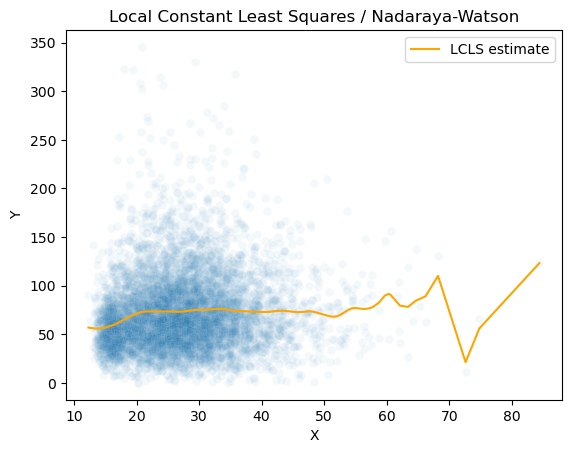

In [ ]:
# Example
mask = df['BodyMassIndexKgm2'].notna() & df['ProteinGm_DR2TOT'].notna()
x = df.loc[mask, 'BodyMassIndexKgm2']
y = df.loc[mask, 'ProteinGm_DR2TOT']

model = LCLS(x, y)          # Initialize
y_hat, grid = model.fit()   # Compute LCLS estimates
model.plot(df, x_col='BodyMassIndexKgm2', y_col='ProteinGm_DR2TOT')  # Plot



The LCLS estimate suggests that people low BMI (12kgm to 16kgm) have a lower protein intake (~57 grams per day). The slope gradualy rises and flattens out at a BMI of about 20kgm and protien intake is around 75 grams per day. This trend continues for all relevant BMI data of up to about 55kgm (all non-outliers).